In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Full_Results_Latest_may.xlsx",sheet_name='Table_Complete')

In [3]:
method2 = {"M":"Benchmark","O":"O.A","P":"P.A"}
df['M2'] = df['Method'].map(method2)


In [4]:
df = df[['v[b]','v[c]','Time','Method','Tgt',"Strain",'K','BObj','M2']]

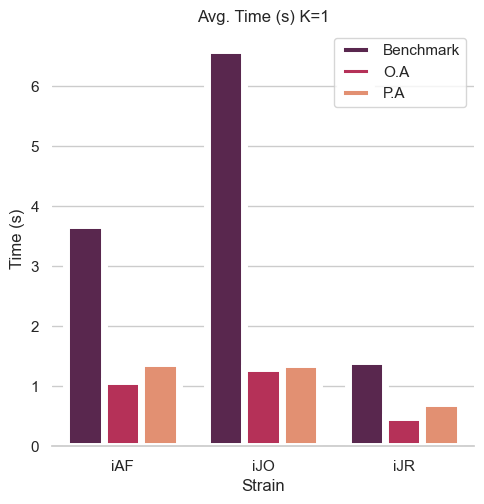

In [81]:
sns.set_theme(style="whitegrid")
g = sns.catplot(data=df[df.K==1],kind='bar',x='Strain',y='Time',hue='M2',
            errorbar=None,palette='rocket',linewidth=5,edgecolor='w',legend=False)
g.despine(left=True)
g.set_ylabels("Time (s)")
g.set(title="Avg. Time (s) K=1")
plt.legend(loc=1)
# g.savefig('final_timek1.png',format='png')

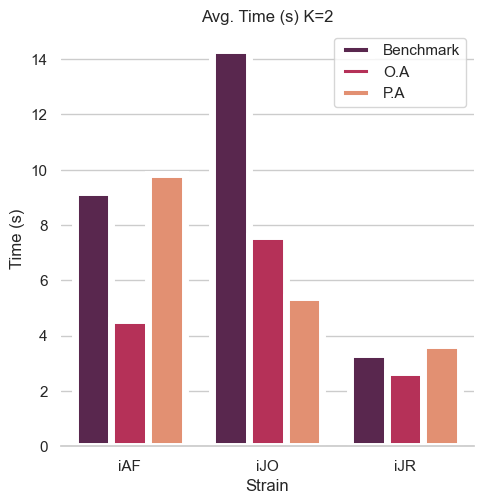

In [82]:
sns.set_theme(style="whitegrid")
g = sns.catplot(data=df[df.K==2],kind='bar',x='Strain',y='Time',hue='M2',
            errorbar=None,palette='rocket',linewidth=5,edgecolor='w',legend=False)
g.despine(left=True)
g.set_ylabels("Time (s)")
g.set(title="Avg. Time (s) K=2")

plt.legend(loc=1)
# g.savefig('final_timek2.png',format='png')

In [7]:
df_dif = pd.DataFrame({'Method' : ["Benchmark","O.A","P.A","Benchmark","O.A","P.A","Benchmark",'O.A','P.A'],
                       'Time' :[0,-56.13,-12.81,0,-57.49,-67.61,0,-33.23,-7.91],
                       'Strain':['iAF','iAF','iAF','iJO','iJO','iJO','iJR',"iJR",'iJR']})

c:\Users\alexa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.38092887, 0.12061482, 0.32506528)) for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


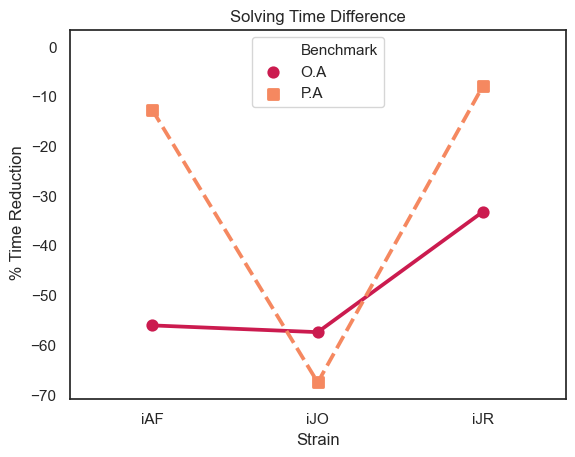

In [83]:
sns.set_theme(style="white")
g = sns.pointplot(data=df_dif,x='Strain',y='Time',hue="Method",palette='rocket',
              markers=['',"o","s"],linestyles=['','-','--'])
g.set_ylabel(" % Time Reduction")
g.set(title="Solving Time Difference")
plt.legend(loc='upper center')
# plt.savefig('final_timedif.png',format='png')

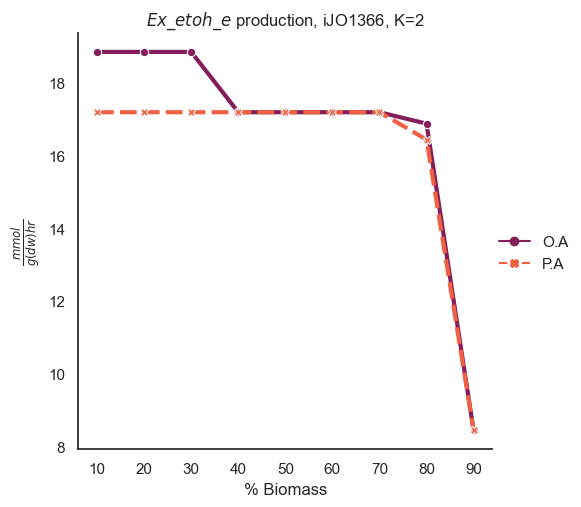

In [84]:
sns.set_theme(style="white")
g = sns.relplot(data=df[(df.Strain =='iJO') & (df.BObj == 'etoh') & (df.K == 2) & (df['M2']!="Benchmark")],
            x='Tgt',y='v[c]',hue='M2',palette="rocket",kind='line',style='M2',
            markers=True,linewidth=3)
g.set(title=r"$\mathit{Ex\_etoh\_e}$ production, iJO1366, K=2")
g.set_xlabels(r'% Biomass')
g.set_ylabels(r'$ \frac{mmol}{g(dw)hr}$')
g.legend.set_title("")
# g.savefig('final_ijoprod.png',format='png')

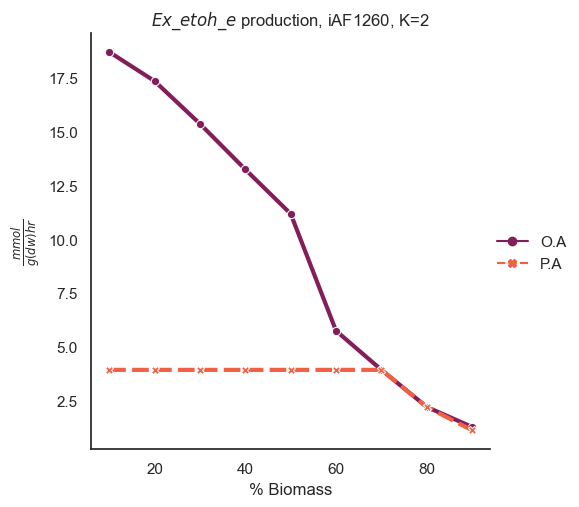

In [85]:
sns.set_theme(style="white")
g = sns.relplot(data=df[(df.Strain =='iAF') & (df.BObj == 'etoh') & (df.K == 2) & (df['M2']!='Benchmark')],
            x='Tgt',y='v[c]',hue='M2',palette="rocket",kind='line',style='M2',
            markers=True,linewidth=3)
g.set(title=r"$\mathit{Ex\_etoh\_e}$ production, iAF1260, K=2")
g.set_xlabels(r'% Biomass')
g.set_ylabels(r'$ \frac{mmol}{g(dw)hr}$')
g.legend.set_title("")
# g.savefig('final_iafprod.png',format='png')

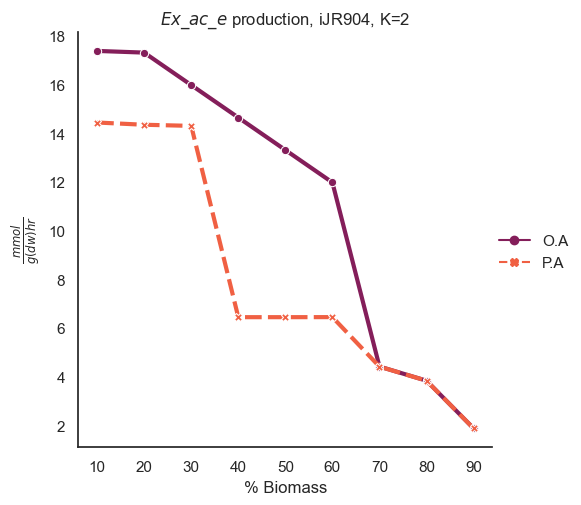

In [86]:
sns.set_theme(style="white")
g = sns.relplot(data=df[(df.Strain =='iJR') & (df.BObj == 'ac') & (df.K == 2) & (df['M2']!='Benchmark')],
            x='Tgt',y='v[c]',hue='M2',palette="rocket",kind='line',style='M2',
            markers=True,linewidth=3)
g.set(title=r"$\mathit{Ex\_ac\_e}$ production, iJR904, K=2")
g.set_xlabels(r'% Biomass')
g.set_ylabels(r'$ \frac{mmol}{g(dw)hr}$')
g.legend.set_title("")
# g.savefig('final_ijrprod.png',format='png')

In [46]:
df_k12 = df[df['K']!=3]

v[b]      v[c]    Time Method  Tgt Strain  K  BObj         M2
1021  0.708457  3.949455   5.094      O   80    iAF  2  succ        O.A
1022  0.817633  0.850923   4.721      P   80    iAF  2  succ        P.A
1023  0.805763  1.505961  14.113      M   90    iAF  2  succ  Benchmark
1024  0.797014  2.317308   4.886      O   90    iAF  2  succ        O.A
1025  0.817633  0.850923   4.502      P   90    iAF  2  succ        P.A

In [47]:
dif_var = df_k12.pivot_table(index='Tgt',columns='M2',values='Time',aggfunc='var')

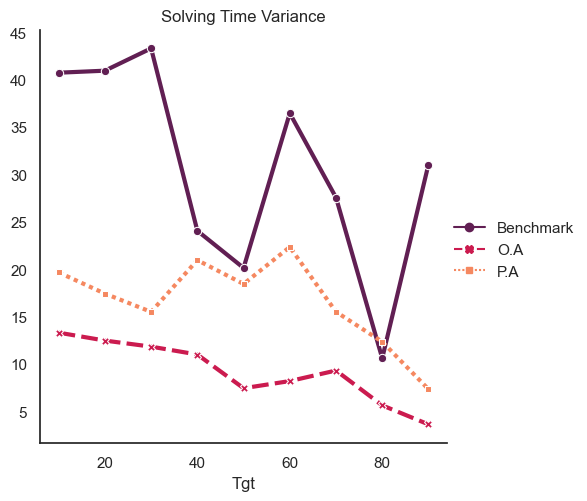

In [87]:
sns.set_theme(style='white')
g = sns.relplot(dif_var,palette='rocket',kind='line',markers=True,linewidth=3)
g.legend.set_title("")
g.set(title="Solving Time Variance")
# g.savefig('timevariance.png',format='png')